In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


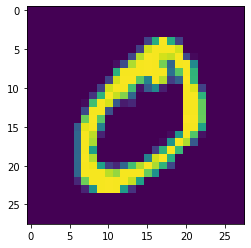

In [8]:
plt.imshow(X_train[1])

In [6]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_train, X_test = X_train/255, X_test/255

In [10]:
X_train.max()

1.0

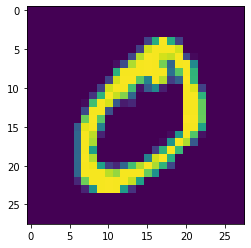

In [11]:
plt.imshow(X_train[1])

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [15]:
model = Sequential()
#Convolution layers
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Flatten())

#hidden layers
model.add(Dense(128, activation='sigmoid',))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(10, activation='softmax'))

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

In [18]:
model.fit(X_train, y_train, epochs=100, callbacks=[early_stop], validation_data=(X_test, y_test), batch_size=32, validation_batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 26s 8ms/step - loss: 0.6550 - accuracy: 0.7875 - val_loss: 0.1056 - val_accuracy: 0.9711
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1809 - accuracy: 0.9563 - val_loss: 0.0813 - val_accuracy: 0.9813
Epoch 3/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1413 - accuracy: 0.9671 - val_loss: 0.1000 - val_accuracy: 0.9781
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1154 - accuracy: 0.9737 - val_loss: 0.0559 - val_accuracy: 0.9869
Epoch 5/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0983 - accuracy: 0.9781 - val_loss: 0.0616 - val_accuracy: 0.9870
Epoch 6/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0881 - accuracy: 0.9802 - val_loss: 0.0713 - val_accuracy: 0.9864
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0780 - accuracy: 0.9819 - val_loss: 0.0674 -

In [19]:
loss = pd.DataFrame(model.history.history)

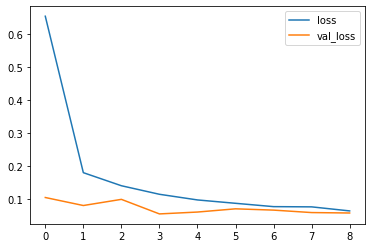

In [20]:
loss[['loss', 'val_loss']].plot()

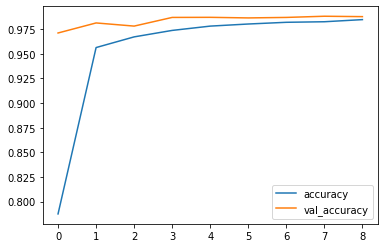

In [21]:
loss[['accuracy', 'val_accuracy']].plot()

In [22]:
pred = model.predict(X_test)

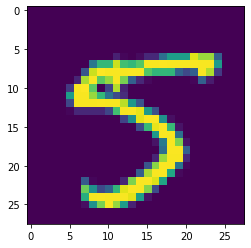

In [24]:
plt.imshow(X_test[102].reshape(28, 28))

In [26]:
np.argmax(pred[102])

5

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [28]:
vd_preds = np.argmax(pred, axis=1)

In [29]:
print(classification_report(y_test, vd_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



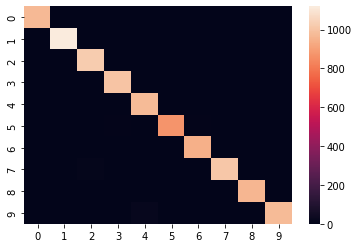

In [30]:
sns.heatmap(confusion_matrix(y_test, vd_preds))

In [31]:
confusion_matrix(y_test, vd_preds)

array([[ 975,    0,    1,    0,    1,    0,    1,    1,    1,    0],
       [   4, 1120,    3,    2,    3,    0,    1,    1,    1,    0],
       [   2,    0, 1027,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    3, 1002,    0,    2,    0,    1,    2,    0],
       [   0,    0,    0,    0,  977,    0,    2,    1,    1,    1],
       [   3,    0,    0,    5,    1,  873,    5,    2,    3,    0],
       [   3,    1,    2,    0,    3,    1,  947,    0,    1,    0],
       [   0,    3,   10,    0,    0,    1,    0, 1013,    1,    0],
       [   1,    0,    2,    0,    2,    0,    1,    1,  966,    1],
       [   3,    0,    0,    1,   18,    2,    0,    4,    4,  977]])